# This notebook is to train AE

# Import librarys

In [3]:
import pandas as pd
from pymatgen import core
from sklearn.preprocessing import StandardScaler
import torch

import src.preprocess_func as preprocess
import src.model as model
import src.plotting as plotting
import src.Variable_generator_2 as vg

# Preprocess data

In [4]:
# Import files
filename = 'srf/SM_FT_dataset.csv'
df = pd.read_csv(filename,index_col=0)

comps = [core.Composition(x) for x in df['Composition']]
dset = preprocess.data_generator(comps)

# X_train data
Training_sequences = dset.real_data
# features' labels
Elements_sequences = dset.elements #input elements sequence

# Y_train data
properties_values = df.iloc[:,1:].values.astype('float32') # Y_train
scaler = StandardScaler() # sklearn Standard_scaler
properties_values_scaled = scaler.fit_transform(properties_values) # Scaled Y_train

# Training models

## Surrogate model

In [7]:
surrogate_model = model.ANN()
surrogate_model.train(Training_sequences,properties_values_scaled)

## To load the trained model
# surrogate_model.load_dict()

## To save the model
# surrogate_model.save_dict()

  0%|          | 0/2000 [00:00<?, ?it/s]

epoch: 100, Loss:0.8401714563369751
epoch: 200, Loss:0.487131267786026
epoch: 300, Loss:0.21158845722675323
epoch: 400, Loss:0.0391068235039711
epoch: 500, Loss:0.008335763588547707
epoch: 600, Loss:0.0032038588542491198
epoch: 700, Loss:0.0016322480514645576
epoch: 800, Loss:0.0012230203719809651
epoch: 900, Loss:0.0010688693728297949
epoch: 1000, Loss:0.0009975278517231345
epoch: 1100, Loss:0.0009675718029029667
epoch: 1200, Loss:0.0009558899328112602
epoch: 1300, Loss:0.0009493017569184303
epoch: 1400, Loss:0.0009459866560064256
epoch: 1500, Loss:0.0009439414134249091
epoch: 1600, Loss:0.0009425010066479445
epoch: 1700, Loss:0.0009415146196261048
epoch: 1800, Loss:0.0009408065234310925
epoch: 1900, Loss:0.0009401661809533834
epoch: 2000, Loss:0.0009375259396620095
******Training ANN completed*****


In [8]:
cAE = model.cAE()
cAE.train(Training_sequences,properties_values_scaled)
# cAE.save_dict()
# cAE.load_dict()

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 100, Loss:0.005508871749043465
epoch: 200, Loss:0.002295643789693713
epoch: 300, Loss:0.0013197275111451745
epoch: 400, Loss:0.0008952608332037926
epoch: 500, Loss:0.0007039265474304557
epoch: 600, Loss:0.0005558874690905213
epoch: 700, Loss:0.00045193530968390405
epoch: 800, Loss:0.00038184269214980304
epoch: 900, Loss:0.00032733127591200173
epoch: 1000, Loss:0.0002866680733859539
*****Training cAE completed*****


In [9]:
cVAE = model.cVAE()
cVAE.train(Training_sequences,properties_values_scaled)
# cVAE.save_dict()
# cVAE.load_dict()

  0%|          | 0/1000 [00:00<?, ?it/s]

epoch: 100, Loss:0.055783431977033615
epoch: 200, Loss:0.018850943073630333
epoch: 300, Loss:0.011616190895438194
epoch: 400, Loss:0.009188145399093628
epoch: 500, Loss:0.007822424173355103
epoch: 600, Loss:0.006955061107873917
epoch: 700, Loss:0.006260779686272144
epoch: 800, Loss:0.005741613917052746
epoch: 900, Loss:0.005322770215570927
epoch: 1000, Loss:0.004967700224369764
*****Training cVAE completed*****


# Import models which are used in paper

## Import surrogate models

In [3]:
# surrogate_model = torch.load("Trained_models_old/ANN.pth")

## Import AE models

In [4]:
# cAE = torch.load("Trained_models_old/cAE.pth")
# cVAE = torch.load("Trained_models_Old/cVAE.pth")

# Temp builded class of variable generator

In [66]:
vg_cAE = model.AE_variable_generator(AE_model=cAE,training_sequences=Training_sequences,
properties_values=properties_values,
properties_values_scaled=properties_values_scaled,
scaler=scaler,
surrogate_model=surrogate_model,
model_name="cAE",
latent_dim=5)

vg_cVAE = model.AE_variable_generator(AE_model=cVAE,training_sequences=Training_sequences,
properties_values=properties_values,
properties_values_scaled=properties_values_scaled,
scaler=scaler,
surrogate_model=surrogate_model,
model_name="cVAE",
latent_dim=5)

# Plots

## latent plot

### cAE

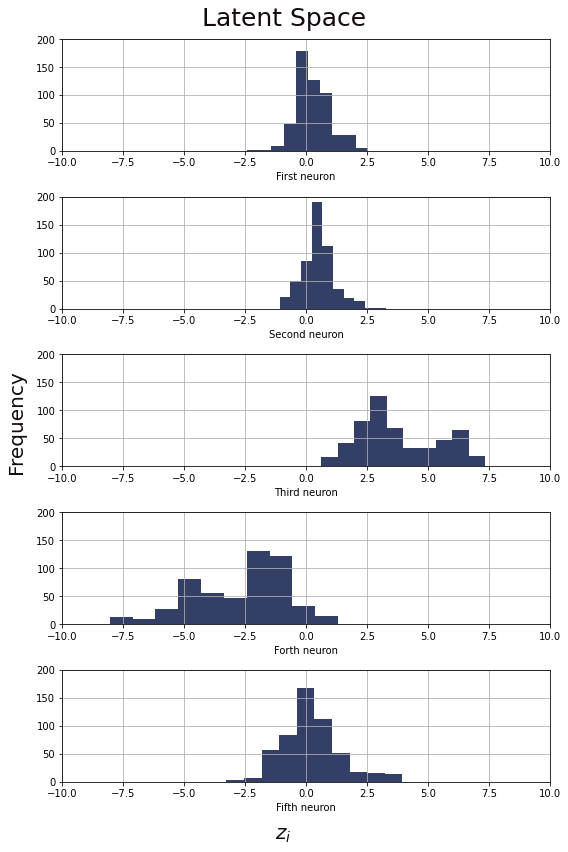

In [69]:
latent_plot_cAE=plotting.latent_code_variance(vg_cAE.latent_code)

### cVAE

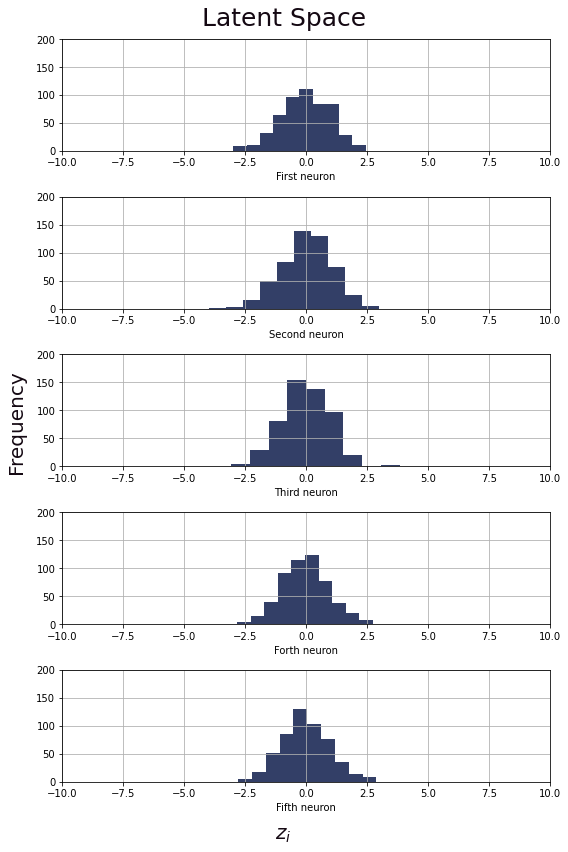

In [70]:
latent_plot_cVAE=plotting.latent_code_variance(vg_cVAE.latent_code)

## Map plots

### cAE

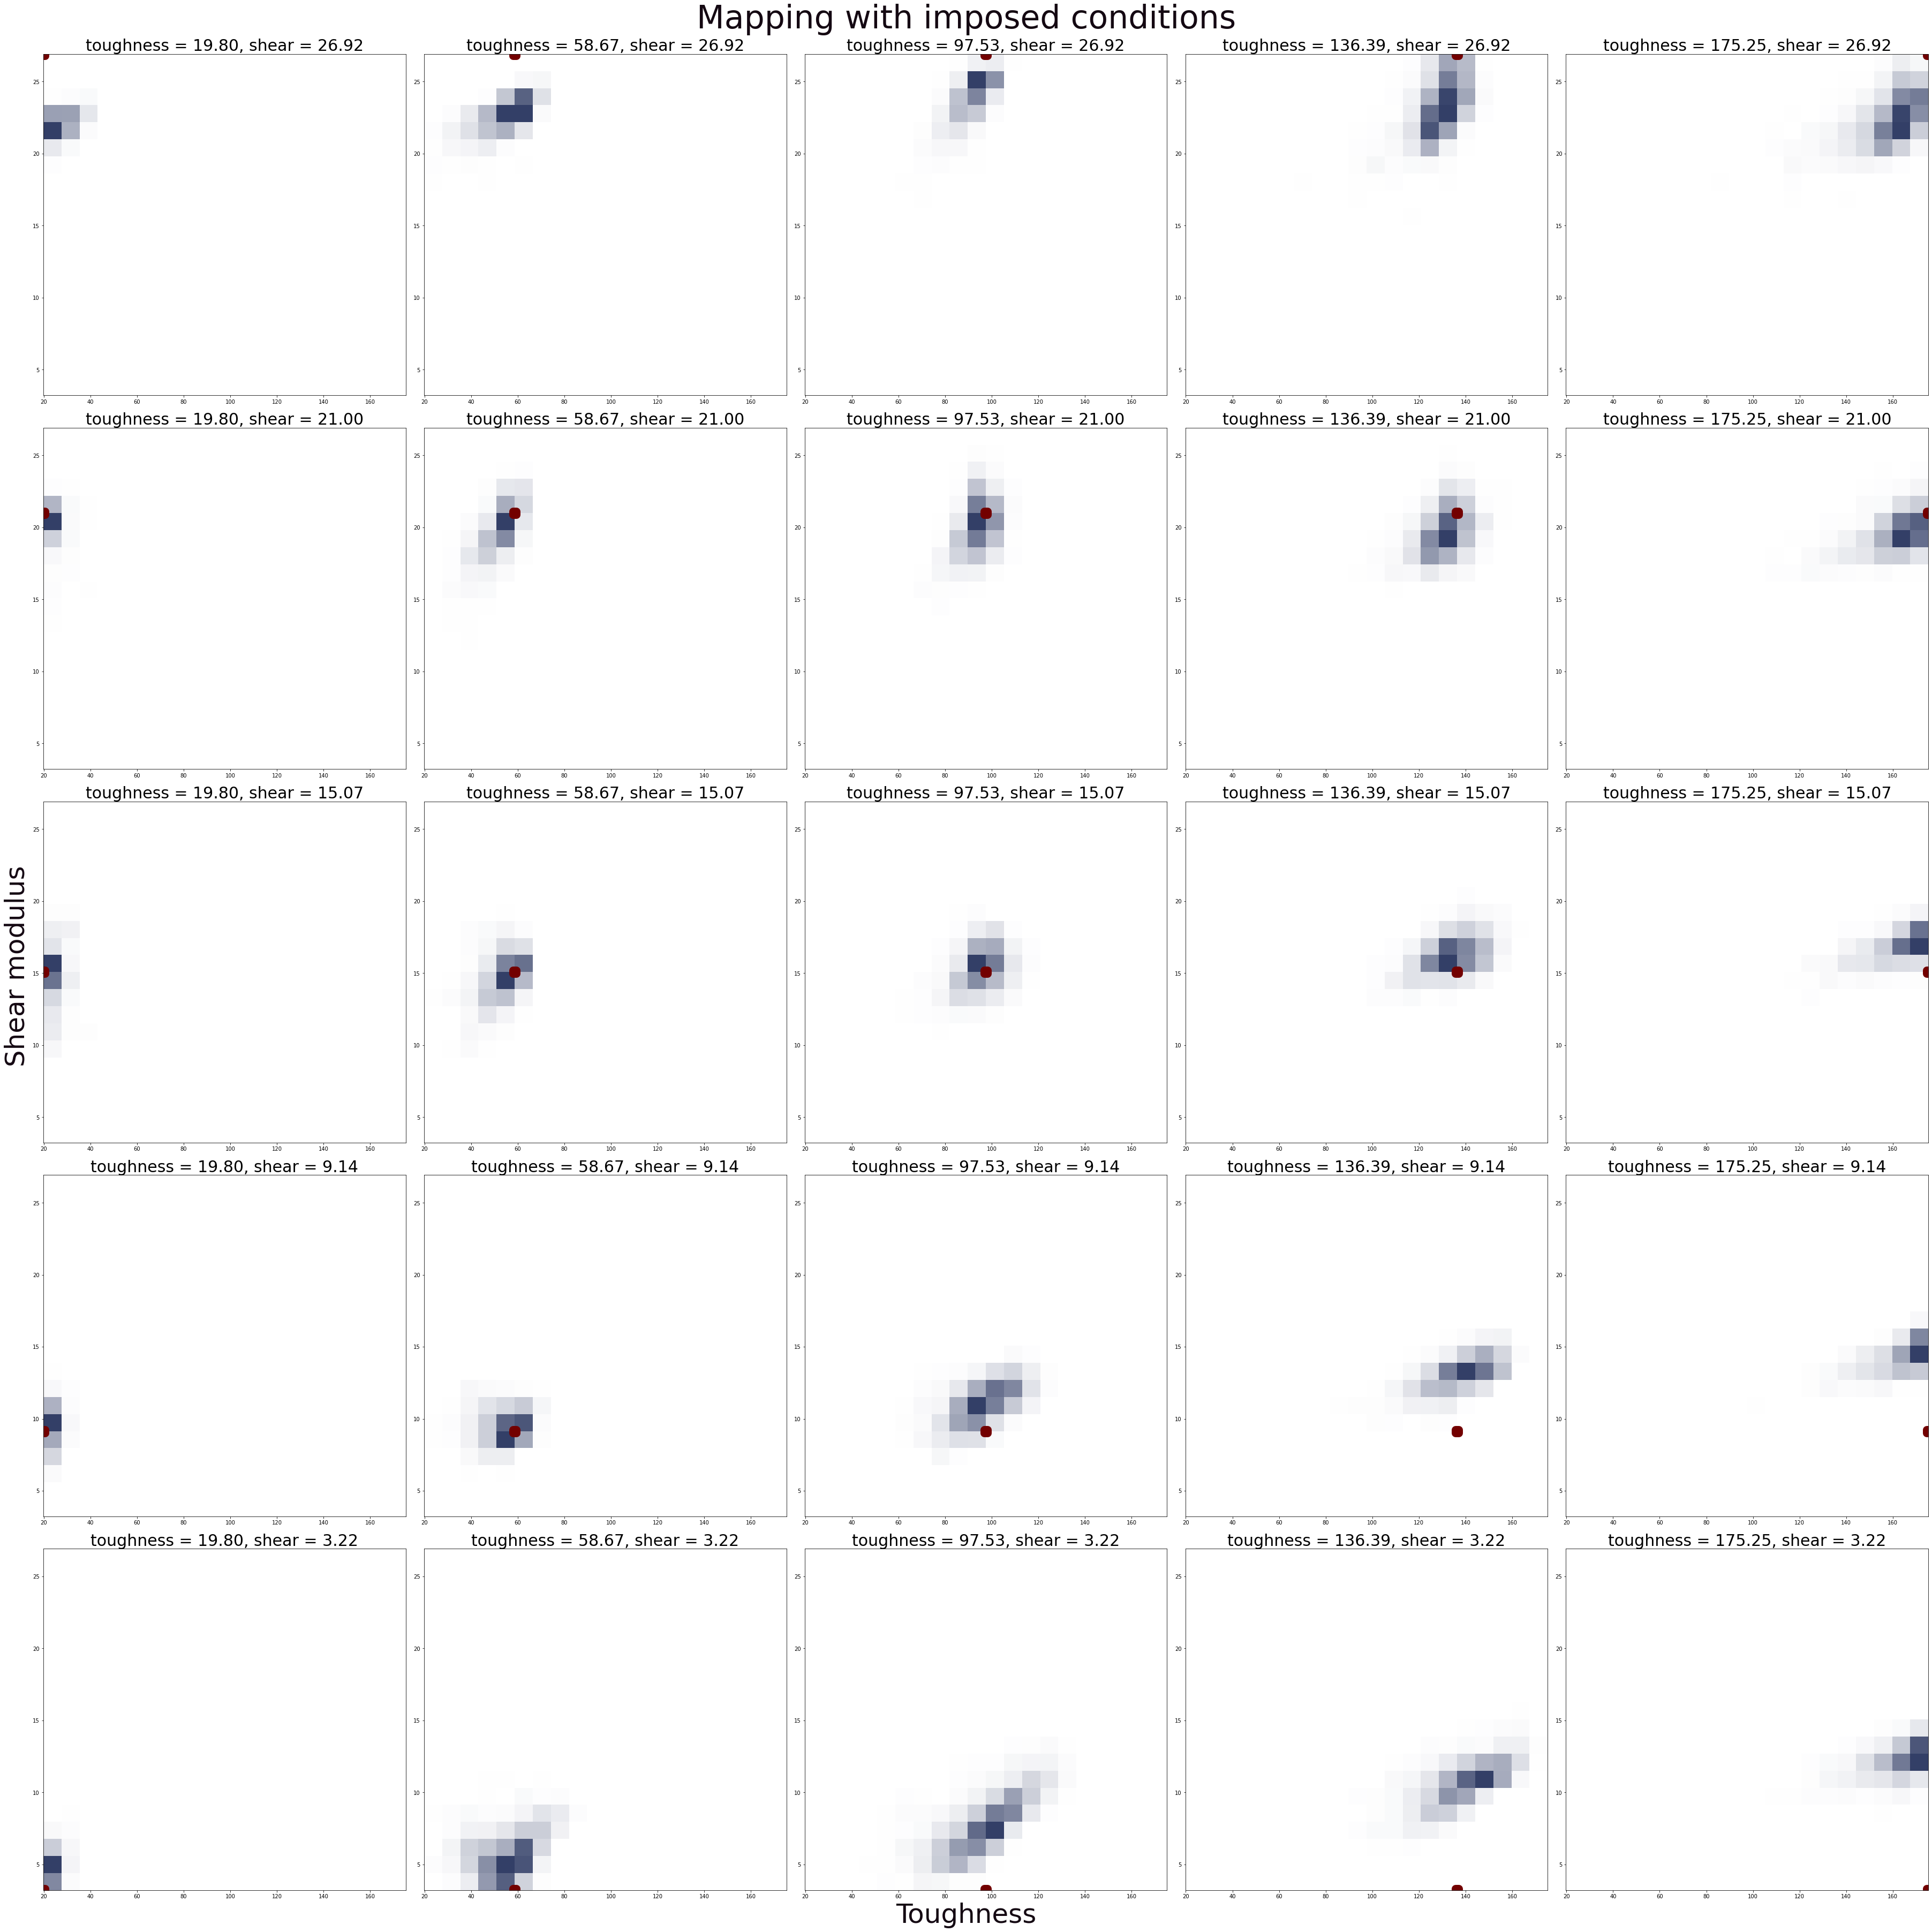

In [71]:
M_cAE_data,M_cAE_conds = vg_cAE.preprocess_mapping()
M_cAE =  plotting.variance_map(M_cAE_data,M_cAE_conds)

### cVAE

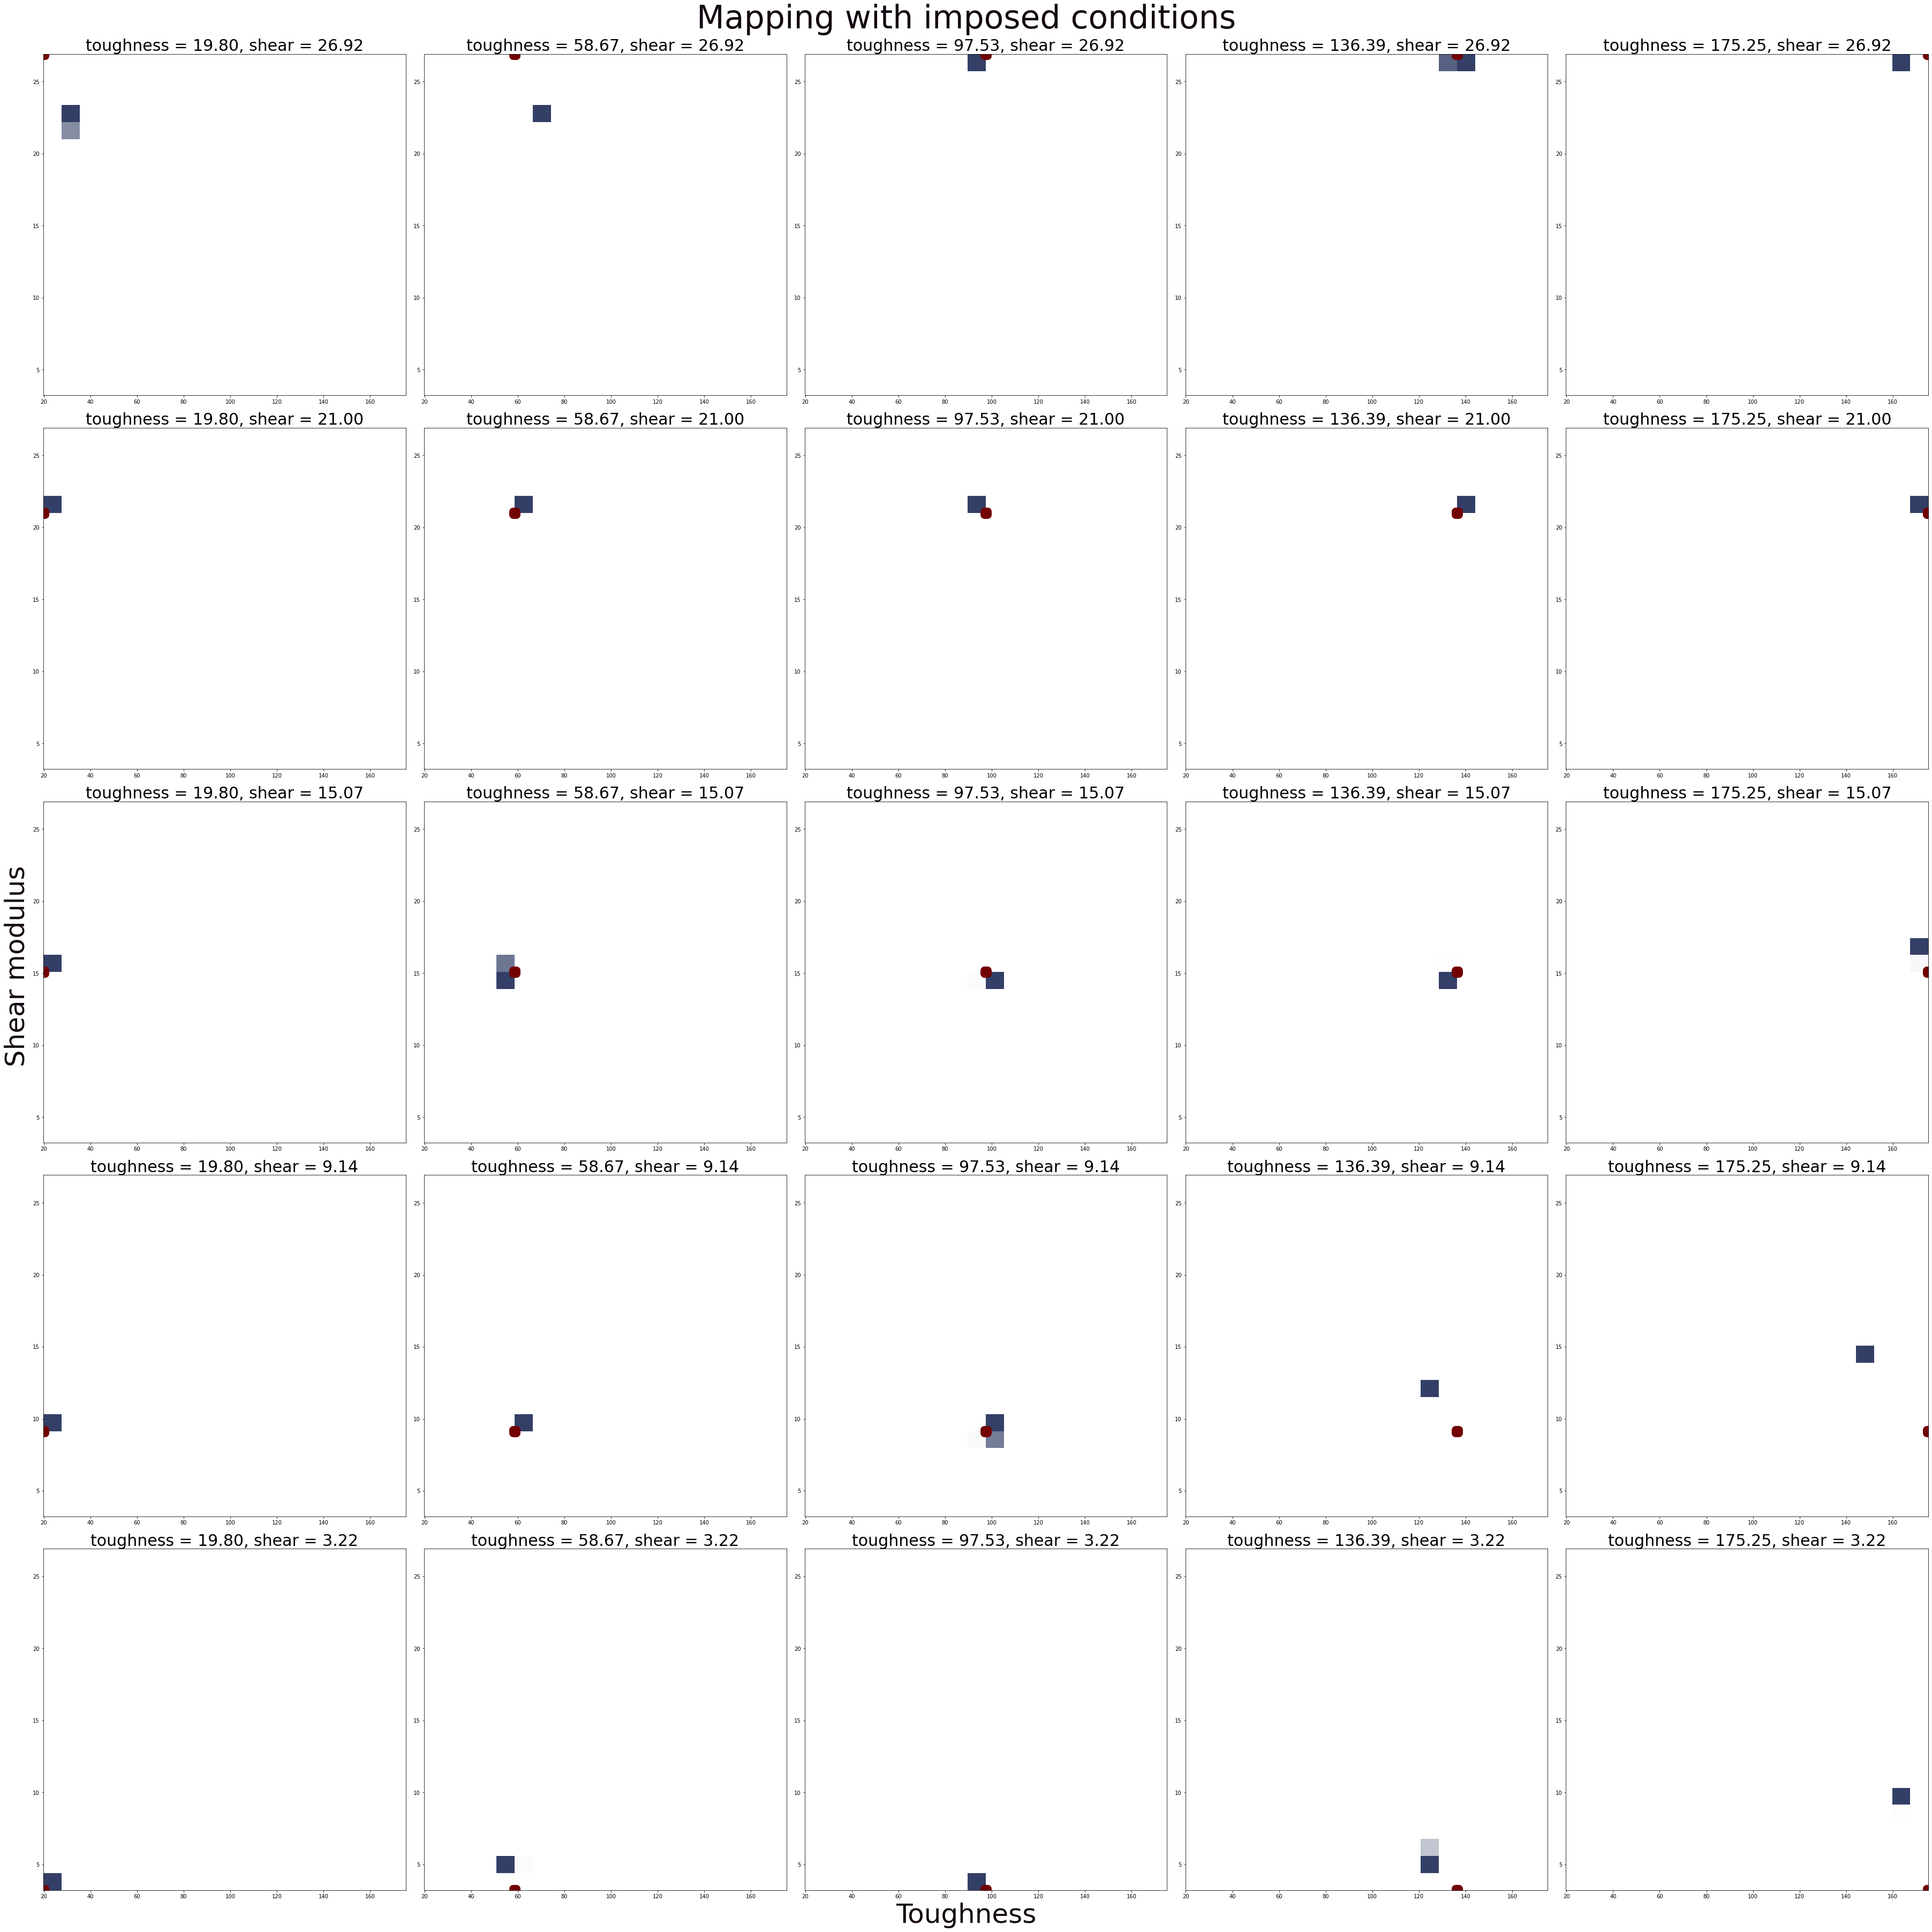

In [72]:
M_cVAE_data,M_cVAE_conds = vg_cVAE.preprocess_mapping()
M_cVAE =  plotting.variance_map(M_cVAE_data,M_cVAE_conds)

## Parioty plots

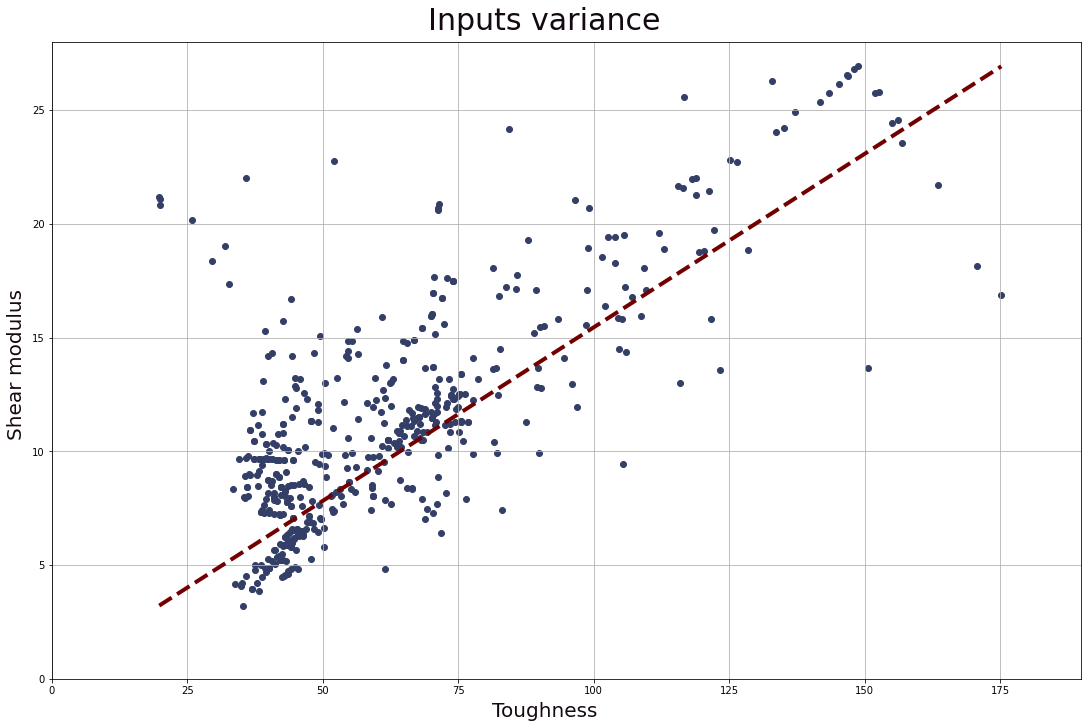

In [9]:
Slice_plot = plotting.input_scatter_plot_slice(properties_values)

### cAE

In [74]:
V_cAE_data,V_cAE_conds,V_recipes = vg_cAE.preprocess_violinplot()
V_cAE = plotting.violin_plot(V_cAE_data,V_cAE_conds)

### cVAE

In [75]:
V_cVAE_data,V_cVAE_conds,V_recipes = vg_cVAE.preprocess_violinplot()
V_cVAE = plotting.violin_plot(V_cVAE_data,V_cVAE_conds)

## Random samples

### cAE

In [76]:
R_cAE_sample,R_cAE_conds = vg_cAE.AE_sampler(500,[136,21])
R_cAE_conds = scaler.inverse_transform(R_cAE_conds)

[130.95041   18.564962]
[133.18207   19.866505]
[126.58603  19.44175]
[140.54355   18.845045]
[128.12126   19.783861]


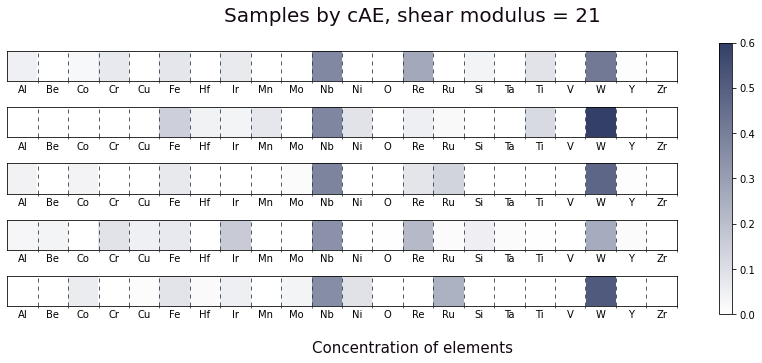

In [77]:
I = 50
R_cAE = plotting.sample_plot(R_cAE_sample,dset,title = "Samples by cAE, shear modulus = 21",interval = I)
for i in range(5):
    print(R_cAE_conds[0+i*I])

In [157]:
plotting.store_fig_pdf(R_cAE,"R_cAE_s21")

### cVAE

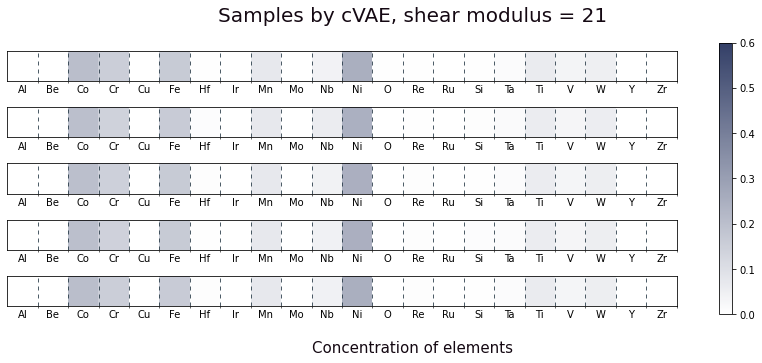

In [78]:
R_cVAE_sample,R_cVAE_conds = vg_cVAE.AE_sampler(500,[75.52,11.33])
R_cVAE = plotting.sample_plot(R_cVAE_sample,dset,title = "Samples by cVAE, shear modulus = 21",interval = 10)

In [79]:
scaler.inverse_transform(R_cVAE_conds)

array([[74.90857  , 11.664205 ],
       [74.787445 , 11.654426 ],
       [75.11873  , 11.700334 ],
       [75.12341  , 11.674362 ],
       [74.6574   , 11.62302  ],
       [74.68338  , 11.651789 ],
       [74.711365 , 11.648687 ],
       [74.87623  , 11.665612 ],
       [74.848434 , 11.671382 ],
       [75.00184  , 11.646794 ],
       [74.71482  , 11.612525 ],
       [74.85135  , 11.657476 ],
       [74.95085  , 11.658638 ],
       [74.95032  , 11.653683 ],
       [75.771225 , 11.747647 ],
       [75.164444 , 11.681667 ],
       [74.988266 , 11.671575 ],
       [74.839645 , 11.669957 ],
       [75.13348  , 11.690982 ],
       [74.63115  , 11.648473 ],
       [74.72639  , 11.65655  ],
       [74.69514  , 11.6573105],
       [75.002815 , 11.690869 ],
       [75.0045   , 11.684115 ],
       [75.12569  , 11.610149 ],
       [75.20118  , 11.649909 ],
       [74.80676  , 11.6640835],
       [74.539536 , 11.6558485],
       [74.65384  , 11.642551 ],
       [75.45883  , 11.711598 ],
       [74

In [162]:
plotting.store_fig_pdf(R_cVAE,"R_cVAE_s21")

## Inerpolation plots fixed conds

### cAE

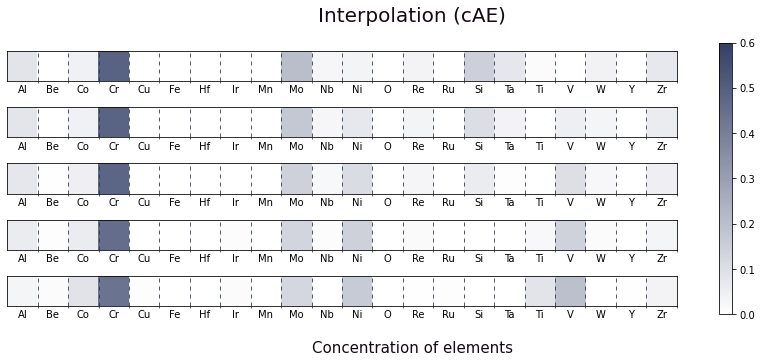

In [80]:
Interpo_cAE_sample_fc,Interpo_cAE_conds_fc=vg_cAE.preprocess_interpolation_AE_fixed_conds([60,15])
Interpo_cAE_fc = plotting.sample_plot(Interpo_cAE_sample_fc,dset,title = "Interpolation (cAE)")

In [192]:
plotting.store_fig_pdf(Interpo_cAE_fc,"Interpo_cAE_fc")

### cVAE

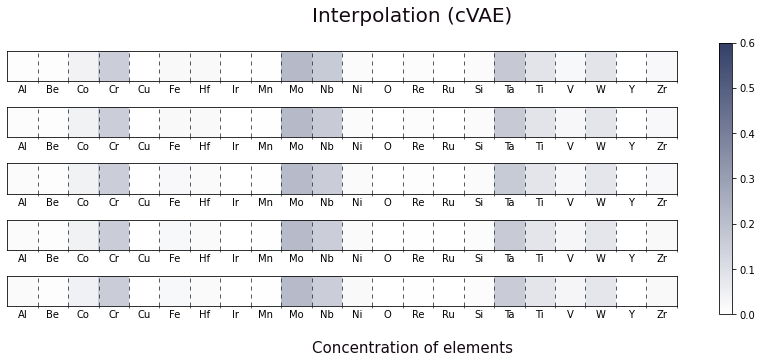

In [81]:
Interpo_cVAE_sample_fc,Interpo_cVAE_conds_fc=vg_cVAE.preprocess_interpolation_AE_fixed_conds([60,15])
Interpo_cVAE_fc = plotting.sample_plot(Interpo_cVAE_sample_fc,dset,title="Interpolation (cVAE)")